#### Setup


In [1]:
import torch
import torchvision
from lib.data_handlers import Load_ImageNet100, Load_PACS
from overcomplete.models import DinoV2, ViT, ResNet, ViT_Large
from torch.utils.data import DataLoader, TensorDataset
from overcomplete.sae import TopKSAE, train_sae
from overcomplete.visualization import (overlay_top_heatmaps, evidence_top_images, zoom_top_images, contour_top_image)
import os
import matplotlib.pyplot as plt
from einops import rearrange
from lib.universal_trainer import train_usae
from lib.activation_generator import Load_activation_dataloader
import torch.nn as nn
from torch.optim.lr_scheduler import SequentialLR, LinearLR, CosineAnnealingLR

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Train a USAE

Define Models and Generate Their Activations

In [2]:
import torch.nn.functional as F

models = {
    "ViT": ViT(device="cuda"),
    "ViT Large": ViT_Large(device="cuda")
}

activation_dir = "activations/ImageNet100_ViT_BL"
image_loader = Load_ImageNet100(transform=None, batch_size=256, shuffle=True)


activations_dataloader = Load_activation_dataloader(
    models=models,
    image_dataloader=image_loader,
    max_seq_len=196,   
    save_dir=activation_dir, 
    generate=True,  
    rearrange_string='n t d -> (n t) d'
    )

c:\Users\sproj_ha\miniconda3\envs\interpretability\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing Batches: 100%|██████████| 508/508 [20:08<00:00,  2.38s/it]


SAE Visualization

In [3]:
concepts = 768 * 8
epochs = 20
lr=3e-4
sample = next(iter(activations_dataloader))

Epoch 1/20:   9%|▉         | 48/508 [00:19<02:49,  2.71it/s, loss=1.36]c:\Users\sproj_ha\miniconda3\envs\interpretability\Lib\site-packages\torch\optim\lr_scheduler.py:198: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Epoch 1/20: 100%|██████████| 508/508 [03:42<00:00,  2.28it/s, loss=1.25]



[Epoch 1] Loss: 642.5884 | Time: 222.36s | Dead Features: 0.0%
ViT Loss: [311.1151857972145]
ViT Large Loss: [331.47320824861526]


Epoch 2/20: 100%|██████████| 508/508 [03:45<00:00,  2.25it/s, loss=1.27]



[Epoch 2] Loss: 615.7048 | Time: 225.70s | Dead Features: 0.0%
ViT Loss: [311.1151857972145, 303.25773960351944]
ViT Large Loss: [331.47320824861526, 312.44705069065094]


Epoch 3/20: 100%|██████████| 508/508 [03:46<00:00,  2.24it/s, loss=1.26]



[Epoch 3] Loss: 613.3163 | Time: 226.90s | Dead Features: 0.0%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216]


Epoch 4/20: 100%|██████████| 508/508 [03:47<00:00,  2.24it/s, loss=1.24]



[Epoch 4] Loss: 609.9171 | Time: 227.16s | Dead Features: 0.0%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281]


Epoch 5/20: 100%|██████████| 508/508 [03:46<00:00,  2.24it/s, loss=1.24]



[Epoch 5] Loss: 606.8362 | Time: 226.51s | Dead Features: 0.0%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966]


Epoch 6/20: 100%|██████████| 508/508 [03:46<00:00,  2.24it/s, loss=1.23]



[Epoch 6] Loss: 604.2100 | Time: 226.69s | Dead Features: 0.0%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446]


Epoch 7/20: 100%|██████████| 508/508 [03:48<00:00,  2.23it/s, loss=1.23]



[Epoch 7] Loss: 602.0711 | Time: 228.25s | Dead Features: 0.1%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173]


Epoch 8/20: 100%|██████████| 508/508 [03:47<00:00,  2.23it/s, loss=1.22]



[Epoch 8] Loss: 600.4169 | Time: 227.36s | Dead Features: 0.3%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577]


Epoch 9/20: 100%|██████████| 508/508 [03:47<00:00,  2.23it/s, loss=1.23]



[Epoch 9] Loss: 599.1128 | Time: 227.78s | Dead Features: 0.5%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525]


Epoch 10/20: 100%|██████████| 508/508 [03:48<00:00,  2.23it/s, loss=1.22]



[Epoch 10] Loss: 598.0185 | Time: 228.16s | Dead Features: 0.7%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495]


Epoch 11/20: 100%|██████████| 508/508 [03:49<00:00,  2.21it/s, loss=1.22]



[Epoch 11] Loss: 597.1405 | Time: 229.54s | Dead Features: 0.9%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518]


Epoch 12/20: 100%|██████████| 508/508 [03:50<00:00,  2.20it/s, loss=1.22]



[Epoch 12] Loss: 596.4194 | Time: 230.46s | Dead Features: 1.5%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006, 294.97757709026337]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518, 301.44180166721344]


Epoch 13/20: 100%|██████████| 508/508 [03:51<00:00,  2.20it/s, loss=1.22]



[Epoch 13] Loss: 595.9514 | Time: 231.11s | Dead Features: 2.0%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006, 294.97757709026337, 294.98578253388405]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518, 301.44180166721344, 300.9655777812004]


Epoch 14/20: 100%|██████████| 508/508 [03:50<00:00,  2.21it/s, loss=1.22]



[Epoch 14] Loss: 595.3646 | Time: 230.10s | Dead Features: 2.5%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006, 294.97757709026337, 294.98578253388405, 294.8875327408314]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518, 301.44180166721344, 300.9655777812004, 300.4770189523697]


Epoch 15/20: 100%|██████████| 508/508 [03:50<00:00,  2.20it/s, loss=1.22]



[Epoch 15] Loss: 595.0002 | Time: 230.93s | Dead Features: 3.0%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006, 294.97757709026337, 294.98578253388405, 294.8875327408314, 294.9083779454231]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518, 301.44180166721344, 300.9655777812004, 300.4770189523697, 300.09180971980095]


Epoch 16/20: 100%|██████████| 508/508 [03:50<00:00,  2.20it/s, loss=1.23]



[Epoch 16] Loss: 594.6826 | Time: 230.51s | Dead Features: 3.8%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006, 294.97757709026337, 294.98578253388405, 294.8875327408314, 294.9083779454231, 294.98980221152306]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518, 301.44180166721344, 300.9655777812004, 300.4770189523697, 300.09180971980095, 299.69275438785553]


Epoch 17/20: 100%|██████████| 508/508 [03:49<00:00,  2.21it/s, loss=1.22]



[Epoch 17] Loss: 594.4749 | Time: 229.97s | Dead Features: 4.3%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006, 294.97757709026337, 294.98578253388405, 294.8875327408314, 294.9083779454231, 294.98980221152306, 295.05263847112656]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518, 301.44180166721344, 300.9655777812004, 300.4770189523697, 300.09180971980095, 299.69275438785553, 299.42224624753]


Epoch 18/20: 100%|██████████| 508/508 [03:50<00:00,  2.20it/s, loss=1.22]



[Epoch 18] Loss: 594.3819 | Time: 230.91s | Dead Features: 4.6%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006, 294.97757709026337, 294.98578253388405, 294.8875327408314, 294.9083779454231, 294.98980221152306, 295.05263847112656, 295.1970438361168]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518, 301.44180166721344, 300.9655777812004, 300.4770189523697, 300.09180971980095, 299.69275438785553, 299.42224624753, 299.18481785058975]


Epoch 19/20: 100%|██████████| 508/508 [03:50<00:00,  2.20it/s, loss=1.21]



[Epoch 19] Loss: 594.3232 | Time: 230.82s | Dead Features: 5.1%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006, 294.97757709026337, 294.98578253388405, 294.8875327408314, 294.9083779454231, 294.98980221152306, 295.05263847112656, 295.1970438361168, 295.18969920277596]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518, 301.44180166721344, 300.9655777812004, 300.4770189523697, 300.09180971980095, 299.69275438785553, 299.42224624753, 299.18481785058975, 299.13352605700493]


Epoch 20/20: 100%|██████████| 508/508 [03:49<00:00,  2.21it/s, loss=1.23]


[Epoch 20] Loss: 594.4137 | Time: 229.93s | Dead Features: 5.8%
ViT Loss: [311.1151857972145, 303.25773960351944, 303.5923972427845, 301.8650164604187, 300.0668298006058, 298.6070513725281, 297.4306616783142, 296.48527216911316, 295.91730239987373, 295.4805108308792, 295.1561576128006, 294.97757709026337, 294.98578253388405, 294.8875327408314, 294.9083779454231, 294.98980221152306, 295.05263847112656, 295.1970438361168, 295.18969920277596, 295.27927365899086]
ViT Large Loss: [331.47320824861526, 312.44705069065094, 309.7238653600216, 308.0520379245281, 306.76940420269966, 305.6029258966446, 304.6404199004173, 303.9316015839577, 303.19550877809525, 302.53793996572495, 301.9843474328518, 301.44180166721344, 300.9655777812004, 300.4770189523697, 300.09180971980095, 299.69275438785553, 299.42224624753, 299.18481785058975, 299.13352605700493, 299.13442623615265]


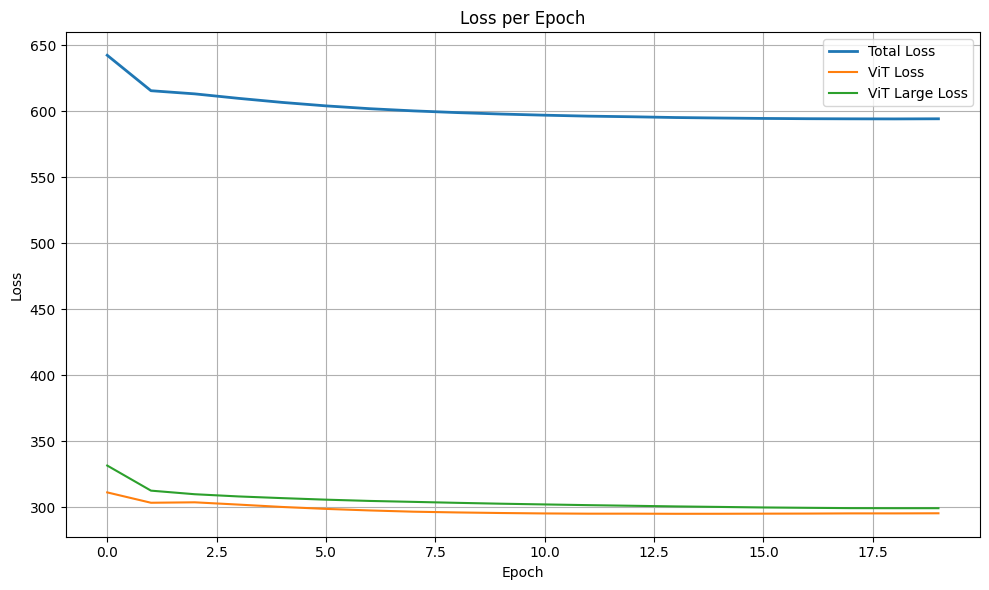

In [4]:
SAEs = {}
optimizers = {}
schedulers = {}

for key, model in models.items():
  
  SAEs[key] = TopKSAE(sample[f"activations_{key}"].shape[-1], nb_concepts=concepts, top_k=32, device='cuda')
  optimizers[key] = torch.optim.Adam(SAEs[key].parameters(), lr=lr)

  # Set up a Linear + Cosine Scheduler
  warmup_scheduler = LinearLR(optimizers[key], start_factor=1e-6 / 3e-4, end_factor=1.0, total_iters=25)
  cosine_scheduler = CosineAnnealingLR(optimizers[key], T_max=epochs, eta_min=1e-6)
  schedulers[key] = SequentialLR(optimizers[key], schedulers=[warmup_scheduler, cosine_scheduler], milestones=[25])


criterion = nn.L1Loss(reduction="mean") # change to mean reduction 

train_usae(names=list(models.keys()),
           models=SAEs,
           dataloader=activations_dataloader,
           criterion=criterion,
           nb_epochs=epochs,
           optimizers=optimizers,
           schedulers=schedulers,
           device='cuda')

In [5]:
model_state_dicts = {name: model.state_dict() for name, model in SAEs.items()}
torch.save(model_state_dicts, "./models/USAE_Vit_BL_20epoch.pt")

KeyboardInterrupt: 

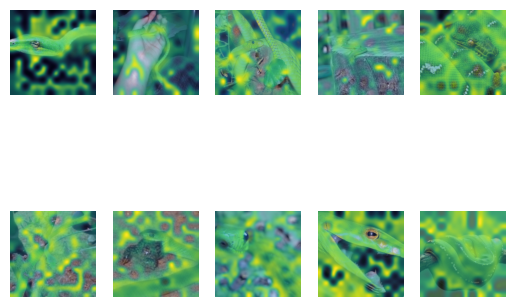

In [7]:
# now the funny part, we have access to 4 functions that allow us to inspect the concepts,
# let use them to understand a bit more the top 3 concepts !


## Create a tensor to save a list of top activations
topk = int(768 * 8) 
selected_concepts = torch.zeros(topk+1)

activations = next(iter(activations_dataloader))


for i, (key, model) in enumerate(models.items()):
  sae = SAEs[key]
  Activations = activations[f'activations_{key}'].to(device)
  with torch.no_grad():
    pre_codes, codes = sae.encode(Activations.squeeze())
    
    codes = rearrange(codes, '(n w h) d -> n w h d', w=16, h=16)
    
    codes_flat = codes.abs().sum(dim=(1, 2))        
    concept_strength = codes_flat.sum(dim=0)        
    top_concepts = torch.argsort(concept_strength, descending=True)[:topk].to(device)
    selected_concepts[i:i + topk] = top_concepts


# Overlay Top 20 for this model
for id in selected_concepts:
#for concept_id in range(50):
  concept_id = int(id.item())
  for key, model in models.items():
    sae = SAEs[key]
    Activations = activations[f'activations_{key}'].to(device)
    with torch.no_grad():
      pre_codes, codes = sae.encode(Activations.squeeze())

    codes = rearrange(codes, '(n w h) d -> n w h d', w=14, h=14)
    
    save_dir = f"results/usae_run9_vit_BL/{key}_concepts"

    overlay_top_heatmaps(activations[f"images"].squeeze(), codes, concept_id=concept_id)
    os.makedirs(save_dir, exist_ok=True)
    filename = f"concept_{concept_id}_{key}.png"
    filepath = os.path.join(save_dir, filename)
    plt.savefig(filepath, bbox_inches='tight', dpi=300)
    plt.close()  

In [10]:
topk = int(768 * 8)
selected_concepts = {}
codes_by_model = {}
images_list = []

# First pass: accumulate concept strengths and save all codes + images
for key, model in models.items():
    sae = SAEs[key]
    concept_strength_total = None
    codes_all_batches = []

    for i, batch in enumerate(activations_dataloader):
        
        if i == len(activations_dataloader) - 1:
            break

        Activations = batch[f'activations_{key}'].to(device)

        # Save original images from this batch once (assuming they're the same for all models)
        if key == list(models.keys())[0]:  # Only collect images once
            images = batch["images"].to(device)
            images_list.append(images)

        with torch.no_grad():
            pre_codes, codes = sae.encode(Activations.squeeze())

        # Reshape codes
        codes = rearrange(codes, '(n w h) d -> n w h d', w=16, h=16)
        codes_all_batches.append(codes.cpu())

        # Sum concept strengths
        codes_flat = codes.abs().sum(dim=(1, 2))   # [batch_size, num_concepts]
        batch_strength = codes_flat.sum(dim=0)     # [num_concepts]

        if concept_strength_total is None:
            concept_strength_total = batch_strength
        else:
            concept_strength_total += batch_strength

    # Save top concepts for this model
    top_concepts = torch.argsort(concept_strength_total, descending=True)[:topk]
    selected_concepts[key] = top_concepts

    # Save codes to use later for visualization
    codes_by_model[key] = torch.cat(codes_all_batches, dim=0)  # shape: [total_images, 16, 16, num_concepts]

# Concatenate all image batches
all_images = torch.cat(images_list, dim=0)  # shape: [total_images, C, H, W]




for key, model in models.items():
    save_dir = f"results/usae_run9_vit_BL/{key}_concepts"
    os.makedirs(save_dir, exist_ok=True)

    top_concepts = selected_concepts[key][:20]
    codes = codes_by_model[key]  # [total_images, 16, 16, num_concepts]

    for concept_id in top_concepts:
        for idx in range(all_images.shape[0]):
            image = all_images[idx]
            code_map = codes[idx]  # [16, 16, num_concepts]

            overlay_top_heatmaps(image, code_map, concept_id=int(concept_id.item()))

            filename = f"img{idx}_concept_{concept_id}_{key}.png"
            filepath = os.path.join(save_dir, filename)
            plt.savefig(filepath, bbox_inches='tight', dpi=300)
            plt.close()

: 